## Set-Up

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import geopandas
import folium
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tweet_df = pd.read_csv('Datasets/Final_dataset/tweet_df_final.csv')
user_df = pd.read_csv('Datasets/Final_dataset/user_df_all_features.csv')

## Time Series of tweets + new users per day

In [ ]:
tweet_df['created_at_day'] = tweet_df['created_at'].apply(lambda row : datetime.strptime(row[:-15],"%Y-%m-%d"))
tweet_count_day = tweet_df.groupby('created_at_day').agg({'tweet_id':'count'})
user_count_day = tweet_df.drop_duplicates(subset = 'user_id', keep = 'first').groupby('created_at_day').agg({'user_id':'count'})

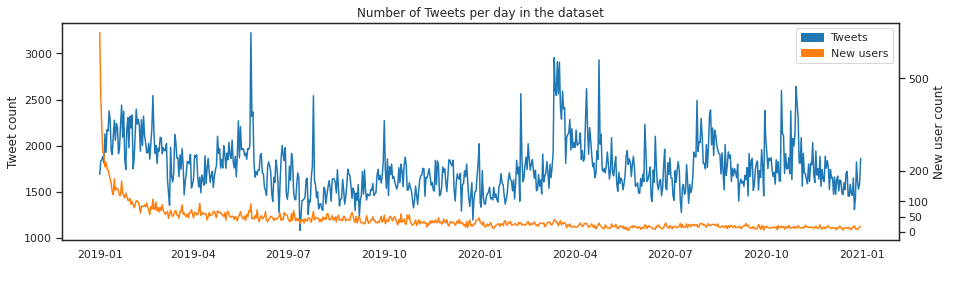

In [ ]:
fig, ax1 = plt.subplots(figsize = (15,4))


colors = {'Tweets':'#1f77b4', 'New users':'#ff7f0e'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax1.legend(handles, labels)
ax1.set_xlabel(' ')
ax1.set_ylabel('Tweet count')
sns.lineplot(x = tweet_count_day.index, y = tweet_count_day.tweet_id, ax = ax1, color = '#1f77b4')

ax2 = ax1.twinx()
ax2.set_ylabel('New user count')
sns.lineplot(x = user_count_day.index, y = user_count_day.user_id, ax = ax2, color = '#ff7f0e')
ax2.set_yticks(ticks = [0,50,100,200,500])
plt.title('Number of Tweets per day in the dataset')
plt.plot()
plt.savefig('tweet_user_ts.pdf', dpi=300, bbox_inches ="tight");


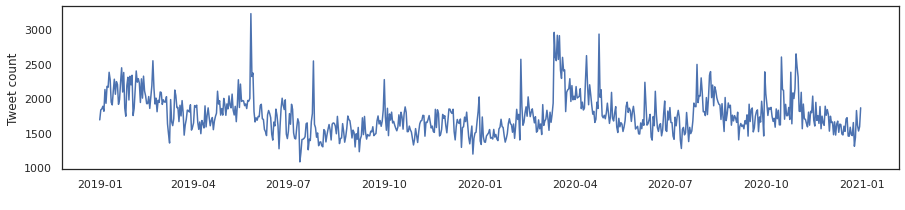

In [ ]:
sns.set_theme(style = 'white')



plt.figure(figsize = (15,3))
sns.lineplot(x = tweet_count_day.index, y = tweet_count_day.tweet_id)
plt.ylabel('Tweet count')
plt.xlabel(' ',size=10)
plt.plot()
plt.savefig('tweet_ts.pdf', dpi=300, bbox_inches ="tight");


##  Visualizing train set vs test set distributions

In [ ]:
Train_gender = np.array([0.328,0.672]) 
Test_gender = np.array([0.31,0.69])  
Train_age = np.array([0.051,0.71,0.086,0.153])   
Test_age = np.array([0.011 ,0.295 ,0.174 , 0.52])  

Train_loc =  np.array([0.178,0.134,0.126,0.082, 0.065,0.141 , 0.274])  #No change
Test_loc =  np.array([0.179, 0.106, 0.15, 0.087,0.056 , 0.082, 0.34])

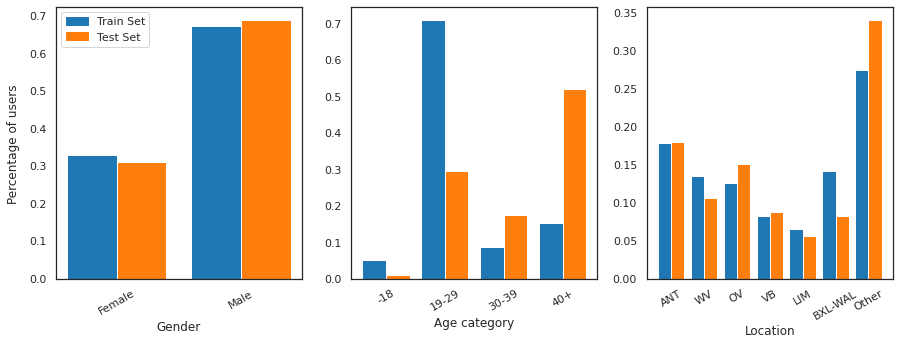

In [ ]:
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5))


colors = {'Train Set':'#1f77b4', 'Test Set':'#ff7f0e'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax1.legend(handles, labels)


ax1.bar(x= np.array([0,1])  -0.2, height = Train_gender, width = 0.4, color = '#1f77b4')
ax1.bar(x =  np.array([0,1]) +0.2, height = Test_gender, width = 0.4, color = '#ff7f0e')
ax1.set_xticks(ticks = [0,1])
ax1.set_xticklabels(labels = ['Female','Male'], rotation = 30)
ax1.set_xlabel('Gender', size = 12)

ax2.bar(x= np.array([0,1,2,3])  -0.2, height = Train_age, width = 0.4,color = '#1f77b4')
ax2.bar(x =  np.array([0,1,2,3]) +0.2, height = Test_age, width = 0.4, color = '#ff7f0e')
ax2.set_xticks(ticks = [0,1,2,3])
ax2.set_xticklabels(labels = ['-18','19-29','30-39','40+'], rotation = 30)
ax2.set_xlabel('Age category', size = 12)

ax3.bar(x= np.array([0,1,2,3,4,5,6])  -0.2, height = Train_loc, width = 0.4,color = '#1f77b4')
ax3.bar(x =  np.array([0,1,2,3,4,5,6]) +0.2, height = Test_loc, width = 0.4, color = '#ff7f0e')
ax3.set_xticks(ticks = [0,1,2,3,4,5,6])
ax3.set_xticklabels( labels = ['ANT','WV','OV','VB','LIM','BXL-WAL','Other'], rotation = 30)
fig.text(0.08,0.5, 'Percentage of users', va = 'center', rotation = 'vertical', size = 12)
ax3.set_xlabel('Location', size = 12)
plt.savefig('train_test.pdf', dpi=300, bbox_inches ="tight");

## Visualising number of tweets per user

In [ ]:
agg_tweet = pd.read_csv('Datasets/agg_tweet_count.csv')

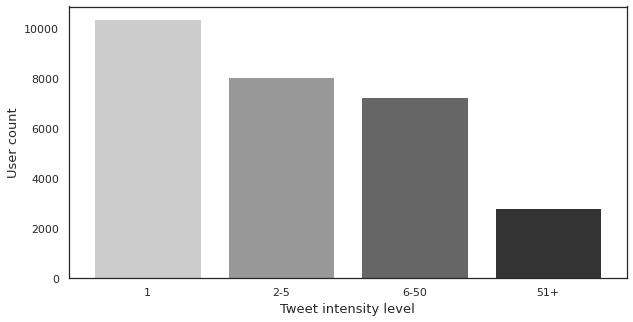

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = agg_tweet['tweet_count_bins'], palette = 'gist_gray_r',
                    order = ['1','2-5','6-50','51+']
             )
plt.ylabel('User count', size = 13)
plt.xlabel('Tweet intensity level',size = 13)
plt.plot()
plt.savefig('tweet_count_user.pdf', dpi=300, bbox_inches ="tight");


## Classification error VS to tweet intensity

In [ ]:
agg_tweet = pd.read_csv('Datasets/agg_tweet_count.csv')
train_labels  = pd.read_csv('Datasets/Final_dataset/snorkel_labels.csv')
pred_gender = pd.read_csv('Datasets/Noisy_Classifiers/gender_predictions.csv')
pred_age = pd.read_csv('Datasets/Noisy_Classifiers/age_predictions.csv')
pred_loc_A = pd.read_csv('Datasets/Noisy_Classifiers/location_A_predictions.csv')
pred_loc_B = pd.read_csv('Datasets/Noisy_Classifiers/location_B_predictions.csv')
pred_loc_C = pd.read_csv('Datasets/Noisy_Classifiers/location_C_predictions.csv')

In [ ]:
gender_labeled = train_labels[train_labels['gender_label'] != 'Unknown']
age_labeled = train_labels[train_labels['age_label'] != 'Unknown']
location_labeled_A = train_labels[train_labels['location_label'] != 'Unknown']
location_labeled_B = train_labels[~train_labels['location_label'].isin(['Unknown','Other'])]
location_labeled_C = train_labels[~train_labels['location_label'].isin(['Unknown','Other','Brussel_Wallonie'])]

gender_agg_tweet = agg_tweet[agg_tweet.user_id.isin(gender_labeled.user_id)]
age_agg_tweet = agg_tweet[agg_tweet.user_id.isin(age_labeled.user_id)]
location_A_agg_tweet = agg_tweet[agg_tweet.user_id.isin(location_labeled_A.user_id)]
location_B_agg_tweet = agg_tweet[agg_tweet.user_id.isin(location_labeled_B.user_id)]
location_C_agg_tweet = agg_tweet[agg_tweet.user_id.isin(location_labeled_C.user_id)]

In [ ]:
gender_labeled = gender_labeled.merge(pred_gender, on = 'user_id', how = 'left')
age_labeled = age_labeled.merge(pred_age, on = 'user_id', how = 'left')
location_labeled_A = location_labeled_A.merge(pred_loc_A, on = 'user_id', how = 'left')
location_labeled_B = location_labeled_B.merge(pred_loc_B, on = 'user_id', how = 'left')
location_labeled_C = location_labeled_C.merge(pred_loc_C, on = 'user_id', how = 'left')
age_labeled['age_label'] = age_labeled['age_label'].map({'-18':0, '20-29':1,'30-39':2,'40+':3})
location_labeled_A['location_label'] = location_labeled_A['location_label'].apply(lambda row : 1 if row == 'Other' else 0)
location_labeled_B['location_label'] = location_labeled_B['location_label'].apply(lambda row : 0 if row == 'Brussel_Wallonie' else 1)
location_labeled_C['location_label'] = location_labeled_C['location_label'].apply(lambda row : 0 if row == 'Antwerpen' 
                                                                                  else 1 if row == 'Limburg' 
                                                                                  else 2 if row == 'Oost_Vlaanderen' 
                                                                                  else 3 if row == 'Vlaams_Brabant' else 4)

In [ ]:
#Gender
accuracy_intensity_df = gender_labeled.merge(gender_agg_tweet, on = 'user_id',how = 'left')
accuracy_intensity_df['gender_label'] = accuracy_intensity_df['gender_label'].map({'Female':0, 'Male':1})
accuracy_intensity_df['error_lr'] = accuracy_intensity_df.apply(lambda row : 1 if row['lr'] != row['gender_label'] else 0, axis = 1)
accuracy_intensity_df['error_rf'] = accuracy_intensity_df.apply(lambda row : 1 if row['rf'] != row['gender_label'] else 0, axis = 1)
accuracy_intensity_df['error_xgb'] = accuracy_intensity_df.apply(lambda row : 1 if row['xgb'] != row['gender_label'] else 0, axis = 1)
accuracy_intensity_df['error_lgbm'] = accuracy_intensity_df.apply(lambda row : 1 if row['lgbm'] != row['gender_label'] else 0, axis = 1)
accuracy_intensity_df['error_cb'] = accuracy_intensity_df.apply(lambda row : 1 if row['cb'] != row['gender_label'] else 0, axis = 1)

agg_metrics = accuracy_intensity_df.groupby('tweet_count_bins').agg({'user_id':'count','error_lr':'sum',
                                                                     'error_rf':'sum','error_xgb':'sum',
                                                                     'error_lgbm':'sum',
                                                                     'error_cb':'sum'}).rename(columns = {'user_id':'user_count'})



agg_metrics['percentage_error_lr'] =   agg_metrics['error_lr'] /agg_metrics['user_count']
agg_metrics['percentage_error_rf'] =   agg_metrics['error_rf'] /agg_metrics['user_count']
agg_metrics['percentage_error_xgb'] =   agg_metrics['error_xgb'] /agg_metrics['user_count']
agg_metrics['percentage_error_lgbm'] =   agg_metrics['error_lgbm'] /agg_metrics['user_count']
agg_metrics['percentage_error_cb'] =   agg_metrics['error_cb'] /agg_metrics['user_count']

In [ ]:
#Age
age_accuracy_intensity_df = age_labeled.merge(age_agg_tweet, on = 'user_id',how = 'left')
age_accuracy_intensity_df['error_lr'] = age_accuracy_intensity_df.apply(lambda row : 1 if row['lr'] != row['age_label'] else 0, axis = 1)
age_accuracy_intensity_df['error_rf'] = age_accuracy_intensity_df.apply(lambda row : 1 if row['rf'] != row['age_label'] else 0, axis = 1)
age_accuracy_intensity_df['error_xgb'] = age_accuracy_intensity_df.apply(lambda row : 1 if row['xgb'] != row['age_label'] else 0, axis = 1)
age_accuracy_intensity_df['error_lgbm'] = age_accuracy_intensity_df.apply(lambda row : 1 if row['lgbm'] != row['age_label'] else 0, axis = 1)
age_accuracy_intensity_df['error_cb'] = age_accuracy_intensity_df.apply(lambda row : 1 if row['cb'] != row['age_label'] else 0, axis = 1)
age_accuracy_intensity_df['error_olr'] = age_accuracy_intensity_df.apply(lambda row : 1 if row['olr'] != row['age_label'] else 0, axis = 1)

age_agg_metrics = age_accuracy_intensity_df.groupby('tweet_count_bins').agg({'user_id':'count','error_lr':'sum',
                                                                     'error_rf':'sum','error_xgb':'sum',
                                                                     'error_lgbm':'sum',
                                                                     'error_cb':'sum',
                                                                     'error_olr':'sum'}).rename(columns = {'user_id':'user_count'})



age_agg_metrics['percentage_error_lr'] =   age_agg_metrics['error_lr'] /age_agg_metrics['user_count']
age_agg_metrics['percentage_error_rf'] =   age_agg_metrics['error_rf'] /age_agg_metrics['user_count']
age_agg_metrics['percentage_error_xgb'] =   age_agg_metrics['error_xgb'] /age_agg_metrics['user_count']
age_agg_metrics['percentage_error_lgbm'] =   age_agg_metrics['error_lgbm'] /age_agg_metrics['user_count']
age_agg_metrics['percentage_error_cb'] =   age_agg_metrics['error_cb'] /age_agg_metrics['user_count']
age_agg_metrics['percentage_error_olr'] =   age_agg_metrics['error_olr'] /age_agg_metrics['user_count']

In [ ]:
#Location
loc_A_accuracy_intensity_df = location_labeled_A.merge(location_A_agg_tweet, on = 'user_id',how = 'left')
loc_A_accuracy_intensity_df['error_lr'] = loc_A_accuracy_intensity_df.apply(lambda row : 1 if row['lr'] != row['location_label'] else 0, axis = 1)
loc_A_accuracy_intensity_df['error_rf'] = loc_A_accuracy_intensity_df.apply(lambda row : 1 if row['rf'] != row['location_label'] else 0, axis = 1)
loc_A_accuracy_intensity_df['error_xgb'] = loc_A_accuracy_intensity_df.apply(lambda row : 1 if row['xgb'] != row['location_label'] else 0, axis = 1)
loc_A_accuracy_intensity_df['error_lgbm'] = loc_A_accuracy_intensity_df.apply(lambda row : 1 if row['lgbm'] != row['location_label'] else 0, axis = 1)
loc_A_accuracy_intensity_df['error_cb'] = loc_A_accuracy_intensity_df.apply(lambda row : 1 if row['cb'] != row['location_label'] else 0, axis = 1)

loc_A_agg_metrics = loc_A_accuracy_intensity_df.groupby('tweet_count_bins').agg({'user_id':'count','error_lr':'sum',
                                                                     'error_rf':'sum','error_xgb':'sum',
                                                                     'error_lgbm':'sum',
                                                                     'error_cb':'sum'}).rename(columns = {'user_id':'user_count'})



loc_A_agg_metrics['percentage_error_lr'] =   loc_A_agg_metrics['error_lr'] /loc_A_agg_metrics['user_count']
loc_A_agg_metrics['percentage_error_rf'] =   loc_A_agg_metrics['error_rf'] /loc_A_agg_metrics['user_count']
loc_A_agg_metrics['percentage_error_xgb'] =   loc_A_agg_metrics['error_xgb'] /loc_A_agg_metrics['user_count']
loc_A_agg_metrics['percentage_error_lgbm'] =   loc_A_agg_metrics['error_lgbm'] /loc_A_agg_metrics['user_count']
loc_A_agg_metrics['percentage_error_cb'] =  loc_A_agg_metrics['error_cb'] /loc_A_agg_metrics['user_count']

In [ ]:
#Location
loc_B_accuracy_intensity_df = location_labeled_B.merge(location_B_agg_tweet, on = 'user_id',how = 'left')
loc_B_accuracy_intensity_df['error_lr'] = loc_B_accuracy_intensity_df.apply(lambda row : 1 if row['lr'] != row['location_label'] else 0, axis = 1)
loc_B_accuracy_intensity_df['error_rf'] = loc_B_accuracy_intensity_df.apply(lambda row : 1 if row['rf'] != row['location_label'] else 0, axis = 1)
loc_B_accuracy_intensity_df['error_xgb'] = loc_B_accuracy_intensity_df.apply(lambda row : 1 if row['xgb'] != row['location_label'] else 0, axis = 1)
loc_B_accuracy_intensity_df['error_lgbm'] = loc_B_accuracy_intensity_df.apply(lambda row : 1 if row['lgbm'] != row['location_label'] else 0, axis = 1)
loc_B_accuracy_intensity_df['error_cb'] = loc_B_accuracy_intensity_df.apply(lambda row : 1 if row['cb'] != row['location_label'] else 0, axis = 1)
loc_B_agg_metrics = loc_B_accuracy_intensity_df.groupby('tweet_count_bins').agg({'user_id':'count','error_lr':'sum',
                                                                     'error_rf':'sum','error_xgb':'sum',
                                                                     'error_lgbm':'sum',
                                                                     'error_cb':'sum'}).rename(columns = {'user_id':'user_count'})



loc_B_agg_metrics['percentage_error_lr'] =   loc_B_agg_metrics['error_lr'] /loc_B_agg_metrics['user_count']
loc_B_agg_metrics['percentage_error_rf'] =   loc_B_agg_metrics['error_rf'] /loc_B_agg_metrics['user_count']
loc_B_agg_metrics['percentage_error_xgb'] =   loc_B_agg_metrics['error_xgb'] /loc_B_agg_metrics['user_count']
loc_B_agg_metrics['percentage_error_lgbm'] =   loc_B_agg_metrics['error_lgbm'] /loc_B_agg_metrics['user_count']
loc_B_agg_metrics['percentage_error_cb'] =  loc_B_agg_metrics['error_cb'] /loc_B_agg_metrics['user_count']

In [ ]:
#Location
loc_C_accuracy_intensity_df = location_labeled_C.merge(location_C_agg_tweet, on = 'user_id',how = 'left')
loc_C_accuracy_intensity_df['error_lr'] = loc_C_accuracy_intensity_df.apply(lambda row : 1 if row['lr'] != row['location_label'] else 0, axis = 1)
loc_C_accuracy_intensity_df['error_rf'] = loc_C_accuracy_intensity_df.apply(lambda row : 1 if row['rf'] != row['location_label'] else 0, axis = 1)
loc_C_accuracy_intensity_df['error_xgb'] = loc_C_accuracy_intensity_df.apply(lambda row : 1 if row['xgb'] != row['location_label'] else 0, axis = 1)
loc_C_accuracy_intensity_df['error_lgbm'] = loc_C_accuracy_intensity_df.apply(lambda row : 1 if row['lgbm'] != row['location_label'] else 0, axis = 1)
loc_C_accuracy_intensity_df['error_cb'] = loc_C_accuracy_intensity_df.apply(lambda row : 1 if row['cb'] != row['location_label'] else 0, axis = 1)

loc_C_agg_metrics = loc_C_accuracy_intensity_df.groupby('tweet_count_bins').agg({'user_id':'count','error_lr':'sum',
                                                                     'error_rf':'sum','error_xgb':'sum',
                                                                     'error_lgbm':'sum',
                                                                     'error_cb':'sum'}).rename(columns = {'user_id':'user_count'})



loc_C_agg_metrics['percentage_error_lr'] =   loc_C_agg_metrics['error_lr'] /loc_C_agg_metrics['user_count']
loc_C_agg_metrics['percentage_error_rf'] =   loc_C_agg_metrics['error_rf'] /loc_C_agg_metrics['user_count']
loc_C_agg_metrics['percentage_error_xgb'] =   loc_C_agg_metrics['error_xgb'] /loc_C_agg_metrics['user_count']
loc_C_agg_metrics['percentage_error_lgbm'] =   loc_C_agg_metrics['error_lgbm'] /loc_C_agg_metrics['user_count']
loc_C_agg_metrics['percentage_error_cb'] =  loc_C_agg_metrics['error_cb'] /loc_C_agg_metrics['user_count']

In [ ]:
agg_metrics = agg_metrics.sort_values(by = 'percentage_error_lr', ascending = False)
age_agg_metrics = age_agg_metrics.sort_values(by = 'percentage_error_xgb', ascending = False)
loc_A_agg_metrics = loc_A_agg_metrics.sort_values(by = 'percentage_error_xgb', ascending = False)
loc_B_agg_metrics = loc_B_agg_metrics.sort_values(by = 'percentage_error_xgb', ascending = False)
loc_C_agg_metrics = loc_C_agg_metrics.sort_values(by = 'percentage_error_xgb', ascending = False)

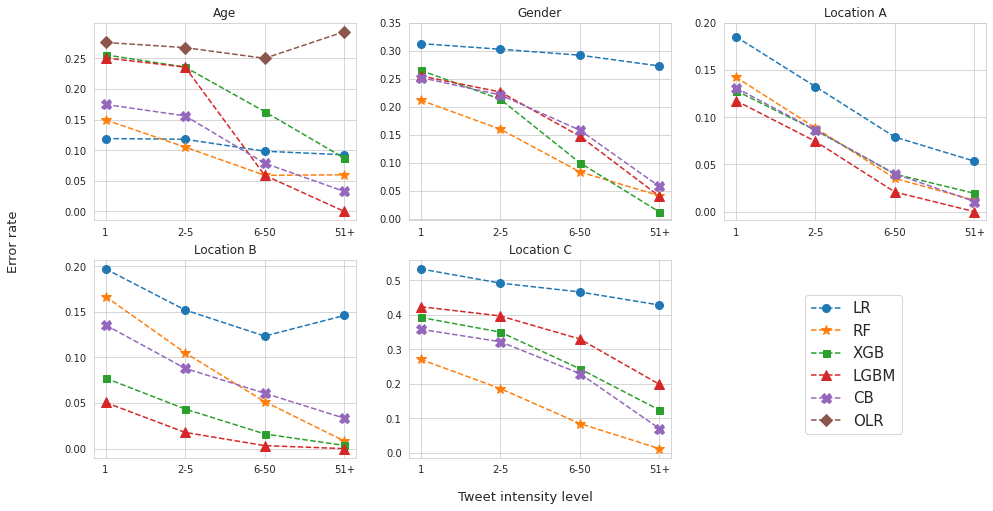

In [ ]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 3, figsize = (16,8))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

ax2.plot(agg_metrics['percentage_error_lr'], linestyle='--', marker='o',markersize = 8,label = 'LR')
ax2.plot(agg_metrics['percentage_error_rf'], linestyle='--', marker='*',markersize = 10, label = 'RF')
ax2.plot(agg_metrics['percentage_error_xgb'], linestyle='--', marker='s',markersize = 7, label = 'XGB')
ax2.plot(agg_metrics['percentage_error_lgbm'], linestyle='--', marker='^',markersize = 10,label = 'LGBM')
ax2.plot(agg_metrics['percentage_error_cb'], linestyle='--', marker='X',markersize = 10,label = 'CB')
ax2.set_yticks(ticks = [0,0.05,0.1,0.15,0.20,0.25,0.30,0.35])
ax2.set_title('Gender')

ax1.plot(age_agg_metrics['percentage_error_lr'], linestyle='--', marker='o',markersize = 8,label = 'LR')
ax1.plot(age_agg_metrics['percentage_error_rf'], linestyle='--', marker='*',markersize = 10, label = 'RF')
ax1.plot(age_agg_metrics['percentage_error_xgb'], linestyle='--', marker='s',markersize = 7, label = 'XGB')
ax1.plot(age_agg_metrics['percentage_error_lgbm'], linestyle='--', marker='^',markersize = 10,label = 'LGBM')
ax1.plot(age_agg_metrics['percentage_error_cb'], linestyle='--', marker='X',markersize = 10,label = 'CB')
ax1.plot(age_agg_metrics['percentage_error_olr'], linestyle='--', marker='D',markersize = 8,label = 'OLR')
ax1.set_yticks(ticks = [0,0.05,0.1,0.15,0.20,0.25])
ax1.set_title('Age')

ax3.plot(loc_A_agg_metrics['percentage_error_lr'], linestyle='--', marker='o',markersize = 8,label = 'LR')
ax3.plot(loc_A_agg_metrics['percentage_error_rf'], linestyle='--', marker='*',markersize = 10, label = 'RF')
ax3.plot(loc_A_agg_metrics['percentage_error_xgb'], linestyle='--', marker='s',markersize = 7, label = 'XGB')
ax3.plot(loc_A_agg_metrics['percentage_error_lgbm'], linestyle='--', marker='^',markersize = 10,label = 'LGBM')
ax3.plot(loc_A_agg_metrics['percentage_error_cb'], linestyle='--', marker='X',markersize = 10,label = 'CB')
ax3.set_yticks(ticks = [0,0.05,0.1,0.15,0.20])
ax3.set_title('Location A')

ax4.plot(loc_B_agg_metrics['percentage_error_lr'], linestyle='--', marker='o',markersize = 8,label = 'LR')
ax4.plot(loc_B_agg_metrics['percentage_error_rf'], linestyle='--', marker='*',markersize = 10, label = 'RF')
ax4.plot(loc_B_agg_metrics['percentage_error_xgb'], linestyle='--', marker='s',markersize = 7, label = 'XGB')
ax4.plot(loc_B_agg_metrics['percentage_error_lgbm'], linestyle='--', marker='^',markersize = 10,label = 'LGBM')
ax4.plot(loc_B_agg_metrics['percentage_error_cb'], linestyle='--', marker='X',markersize = 10,label = 'CB')
ax4.set_yticks(ticks = [0,0.05,0.1,0.15,0.20])
ax4.set_title('Location B')

ax5.plot(loc_C_agg_metrics['percentage_error_lr'], linestyle='--', marker='o',markersize = 8,label = 'LR')
ax5.plot(loc_C_agg_metrics['percentage_error_rf'], linestyle='--', marker='*',markersize = 10, label = 'RF')
ax5.plot(loc_C_agg_metrics['percentage_error_xgb'], linestyle='--', marker='s',markersize = 7, label = 'XGB')
ax5.plot(loc_C_agg_metrics['percentage_error_lgbm'], linestyle='--', marker='^',markersize = 10,label = 'LGBM')
ax5.plot(loc_C_agg_metrics['percentage_error_cb'], linestyle='--', marker='X',markersize = 10,label = 'CB')
ax5.set_yticks(ticks = [0,0.1,0.20,0.3,0.4,0.5])
ax5.set_title('Location C')

ax6.axis('off')

lines_labels = [ax1.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc=(0.81,0.15), prop={'size': 15} )

fig.text(0.05,0.5, 'Error rate', va = 'center', rotation = 'vertical',size = 13)
fig.text(0.5, 0.05, 'Tweet intensity level', ha='center',size =13)
plt.savefig('error_intensity.pdf', dpi=300, bbox_inches ="tight");



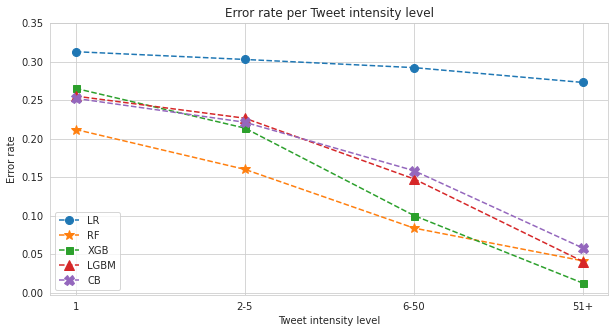

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.plot(agg_metrics['percentage_error_lr'], linestyle='--', marker='o',markersize = 8,label = 'LR')
plt.plot(agg_metrics['percentage_error_rf'], linestyle='--', marker='*',markersize = 10, label = 'RF')
plt.plot(agg_metrics['percentage_error_xgb'], linestyle='--', marker='s',markersize = 7, label = 'XGB')
plt.plot(agg_metrics['percentage_error_lgbm'], linestyle='--', marker='^',markersize = 10,label = 'LGBM')
plt.plot(agg_metrics['percentage_error_cb'], linestyle='--', marker='X',markersize = 10,label = 'CB')
plt.legend()
plt.title('Error rate per Tweet intensity level')
plt.ylabel('Error rate')
plt.xlabel('Tweet intensity level')
plt.yticks(ticks = [0,0.05,0.1,0.15,0.20,0.25,0.30,0.35])
plt.savefig('error_intensity_gender.pdf', dpi=300, bbox_inches ="tight");

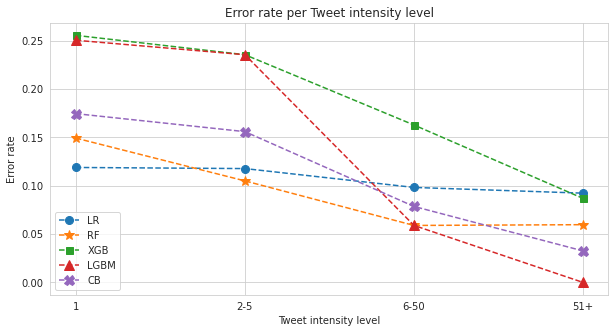

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.plot(age_agg_metrics['percentage_error_lr'], linestyle='--', marker='o',markersize = 8,label = 'LR')
plt.plot(age_agg_metrics['percentage_error_rf'], linestyle='--', marker='*',markersize = 10, label = 'RF')
plt.plot(age_agg_metrics['percentage_error_xgb'], linestyle='--', marker='s',markersize = 7, label = 'XGB')
plt.plot(age_agg_metrics['percentage_error_lgbm'], linestyle='--', marker='^',markersize = 10,label = 'LGBM')
plt.plot(age_agg_metrics['percentage_error_cb'], linestyle='--', marker='X',markersize = 10,label = 'CB')
plt.yticks(ticks = [0,0.05,0.1,0.15,0.20,0.25])
plt.legend(loc = 3)
plt.title('Error rate per Tweet intensity level')
plt.ylabel('Error rate')
plt.xlabel('Tweet intensity level')

plt.savefig('error_intensity_age.pdf', dpi=300, bbox_inches ="tight");

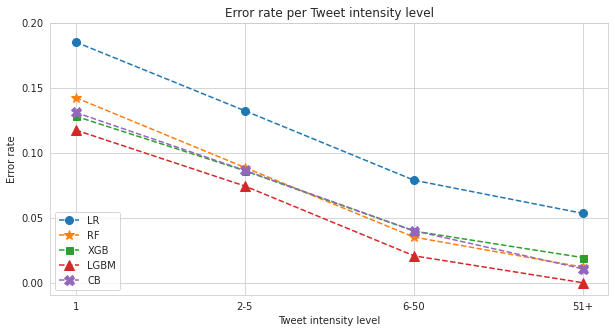

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.plot(loc_A_agg_metrics['percentage_error_lr'], linestyle='--', marker='o',markersize = 8,label = 'LR')
plt.plot(loc_A_agg_metrics['percentage_error_rf'], linestyle='--', marker='*',markersize = 10, label = 'RF')
plt.plot(loc_A_agg_metrics['percentage_error_xgb'], linestyle='--', marker='s',markersize = 7, label = 'XGB')
plt.plot(loc_A_agg_metrics['percentage_error_lgbm'], linestyle='--', marker='^',markersize = 10,label = 'LGBM')
plt.plot(loc_A_agg_metrics['percentage_error_cb'], linestyle='--', marker='X',markersize = 10,label = 'CB')
plt.yticks(ticks = [0,0.05,0.1,0.15,0.20])
plt.legend(loc = 3)
plt.title('Error rate per Tweet intensity level')
plt.ylabel('Error rate')
plt.xlabel('Tweet intensity level')
plt.savefig('error_intensity_loc_A.pdf', dpi=300, bbox_inches ="tight");

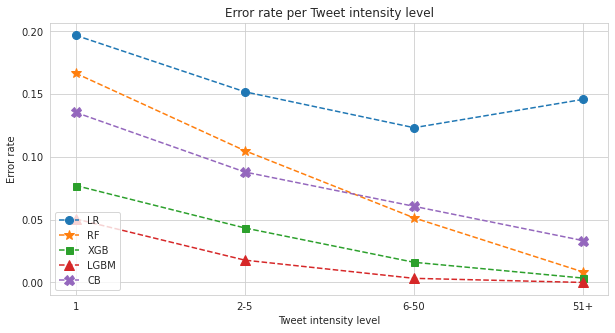

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.plot(loc_B_agg_metrics['percentage_error_lr'], linestyle='--', marker='o',markersize = 8,label = 'LR')
plt.plot(loc_B_agg_metrics['percentage_error_rf'], linestyle='--', marker='*',markersize = 10, label = 'RF')
plt.plot(loc_B_agg_metrics['percentage_error_xgb'], linestyle='--', marker='s',markersize = 7, label = 'XGB')
plt.plot(loc_B_agg_metrics['percentage_error_lgbm'], linestyle='--', marker='^',markersize = 10,label = 'LGBM')
plt.plot(loc_B_agg_metrics['percentage_error_cb'], linestyle='--', marker='X',markersize = 10,label = 'CB')
plt.yticks(ticks = [0,0.05,0.1,0.15,0.20])
plt.legend(loc = 3)
plt.title('Error rate per Tweet intensity level')
plt.ylabel('Error rate')
plt.xlabel('Tweet intensity level')

plt.savefig('error_intensity_loc_B.pdf', dpi=300, bbox_inches ="tight");

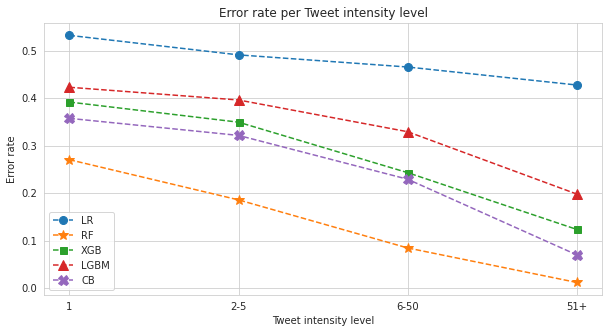

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.plot(loc_C_agg_metrics['percentage_error_lr'], linestyle='--', marker='o',markersize = 8,label = 'LR')
plt.plot(loc_C_agg_metrics['percentage_error_rf'], linestyle='--', marker='*',markersize = 10, label = 'RF')
plt.plot(loc_C_agg_metrics['percentage_error_xgb'], linestyle='--', marker='s',markersize = 7, label = 'XGB')
plt.plot(loc_C_agg_metrics['percentage_error_lgbm'], linestyle='--', marker='^',markersize = 10,label = 'LGBM')
plt.plot(loc_C_agg_metrics['percentage_error_cb'], linestyle='--', marker='X',markersize = 10,label = 'CB')
plt.yticks(ticks = [0,0.1,0.20,0.3,0.4,0.5])
plt.legend(loc = 3)
plt.title('Error rate per Tweet intensity level')
plt.ylabel('Error rate')
plt.xlabel('Tweet intensity level')

plt.savefig('error_intensity_loc_C.pdf', dpi=300, bbox_inches ="tight");

## Geodataframe folium map

In [ ]:
tweet_df = pd.read_csv("Datasets/Final_dataset/tweet_df_final.csv")

In [ ]:
geometry = geopandas.points_from_xy(tweet_df.latitude, tweet_df.longitude)
geo_df = geopandas.GeoDataFrame(tweet_df, geometry=geometry)

geo_df = geo_df.loc[0:1000]
len(geo_df)

1001

In [ ]:
map = folium.Map(location = [50.8505,4.3488], tiles='OpenStreetMap' , zoom_start = 9)


CPU times: user 6.92 ms, sys: 1.11 ms, total: 8.03 ms
Wall time: 12.9 ms


In [ ]:
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]


i = 0
for coordinates in geo_df_list:
        map.add_child(folium.Marker(location = coordinates,
                            popup =                            
                            "Name: " + str(geo_df.location_geo[i]),
                            icon = folium.Icon(color = "blue")))
    i = i + 1

CPU times: user 118 ms, sys: 8.87 ms, total: 126 ms
Wall time: 129 ms


In [ ]:
map  

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs
